# Logistic Regression on a Donut

In the following notebook, we'll be using the BinaryLogisticRegression classifier I built from scratch to fit a donut-shaped distribution using a radial basis function. First, we'll import numpy and pyplot along with the classifier and donut distribution.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from FromScratchModule.Regression import BinaryLogisticRegression
from FromScratchModule.Toy import donut

# The Donut

As you can see from the below cells, the distribution is simply a 2-D shape containing an inner disk and outer ring.

In [2]:
# The Donut Distributions as seen in FromScratch.Toy.donut
def Donut(n, r, margin):
    x = np.random.randn(n, 2)
    x_donut = x[np.sqrt(np.sum(x ** 2, axis=1)) > 1] * (r + margin / 2)
    x_hole = x[np.sqrt(np.sum(x ** 2, axis=1)) <= 1] * (r - margin / 2)

    y_hole = np.zeros([x_hole.shape[0], 1])
    y_donut = np.ones([x_donut.shape[0], 1])

    x = np.vstack([x_hole, x_donut])
    y = np.vstack([y_hole, y_donut])
    return x, y

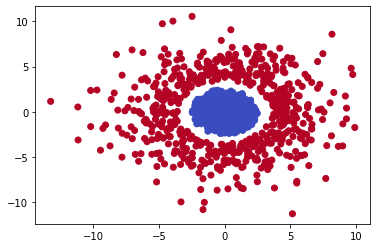

In [3]:
# Here use the donut function to create a donut of radius 3, using 1000 points each for the ring and disk 
x,y = donut(1000, 3, 1)
plt.scatter(x[:,[0]], x[:,[1]], c=y, cmap='coolwarm')

# Radial Basis Function

It's pretty obvious that some weights and a single sigmoid activation would not be able to fit this function, as we're essentially modeling a circular XOR function. To avoid turning this into some solution involving a neural network, we'll instead use our knowleged of how the donut was formed to fit the solution. Specifically, we know that points were actually classified based on their distance from the center, so we'll extract this information from our input variable and use it to fit the classifier.

In [4]:
# Get the distance from each point to the center of the donut
phi = np.sqrt(x[:,[0]]**2 + x[:,[1]]**2)

np.hstack((x[:,[0]], x[:,[1]], phi))

array([[ 2.26998468,  0.4624256 ,  2.31660697],
       [-2.13033705, -0.20804779,  2.14047187],
       [ 1.98117752,  1.29907826,  2.36910715],
       ...,
       [-0.94330898,  3.38718991,  3.51608977],
       [-0.60597488,  5.54248125,  5.5755093 ],
       [-1.9627181 ,  3.17055166,  3.7288953 ]])

In [5]:
# We'll use phi as the domain function to help our simple model fit the Donut
model = BinaryLogisticRegression()
weights = model.fit(phi, y, pad=True)
print('Distance weight: {}\nBias weight: {}'.format(weights[0], weights[1]))

Distance weight: [-5.28410301]
Bias weight: [1.81894935]


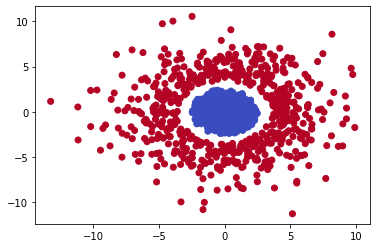

In [6]:
p_hat = model.predict(phi, pad=True)
y_hat = p_hat > 0.5
plt.scatter(x[:,[0]], x[:,[1]], c=y_hat, cmap='coolwarm')

As you can see, the distribution was fit perfectly, showing that the classifier successfully learned how to classify the points based on their distance from the center.